In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/lab2_q2.csv", header = None)

y_raw = df.iloc[:, 0].values
y = (y_raw == 1).astype(int)
# doing this to convert -1 to 0 and keep 1 as 1
X = df.iloc[:, 1:].values

In [3]:
m, n = X.shape
X = np.hstack((np.ones((m, 1)), X))

In [4]:
np.random.seed(46)
perm = np.random.permutation(m)
X, y = X[perm], y[perm]
idx1, idx2 = int(0.7*m), int(0.85*m)

In [5]:
X_T, y_T = X[:idx1], y[:idx1]
X_V, y_V = X[idx1:idx2], y[idx1:idx2]
X_O, y_O = X[idx2:], y[idx2:]

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logloss_fn(X, y, w):
    m = len(y)
    h = sigmoid(X @ w)
    epsilon = 1e-5
    loss = - (1/m) * (y @ np.log(h + epsilon) + (1 - y) @ np.log(1 - h + epsilon))
    return loss

def gradient(X, y, w):
    m = len(y)
    h = sigmoid(X @ w)
    grad = (1/m) * (X.T @ (h - y))
    return grad

def accuracy_and_loss(X, y, w):
    preds = (sigmoid(X @ w) >= 0.5).astype(int)
    acc = np.mean(preds == y)
    err = logloss_fn(X, y, w)
    return acc, err

def gradient_descent(X_T, y_T, X_V, y_V, lr=0.01, epoch=1000, tol=1e-6):
    m, n = X_T.shape
    w = np.zeros(n)
    loss_history = []
    train_acc, val_acc = [], []
    train_err, val_err = [], []

    for i in range(epoch):
        grad = gradient(X_T, y_T, w)
        w -= lr * grad
        loss = logloss_fn(X_T, y_T, w)
        loss_history.append(loss)

        acc_T, err_T = accuracy_and_loss(X_T, y_T, w)
        acc_V, err_V = accuracy_and_loss(X_V, y_V, w)


        train_acc.append(acc_T)
        train_err.append(err_T)
        val_acc.append(acc_V)
        val_err.append(err_V)

        if i > 0 and abs(loss_history[-2] - loss_history[-1]) < tol:
            print(f"Converged at iteration {i}")
            break

    return w, loss_history, train_acc, val_acc, train_err, val_err


In [7]:
w, loss_history, train_acc, val_acc, train_err, val_err = gradient_descent(X_T, y_T, X_V, y_V, lr=0.01, epoch=1000)

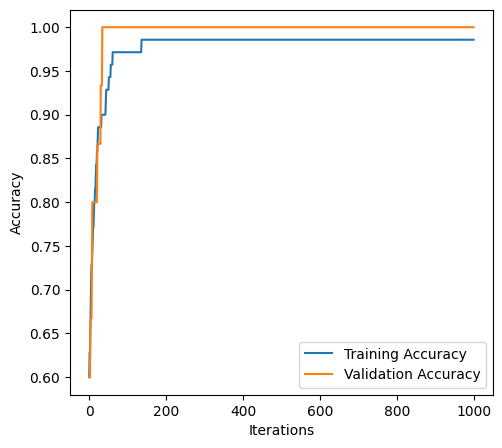

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()


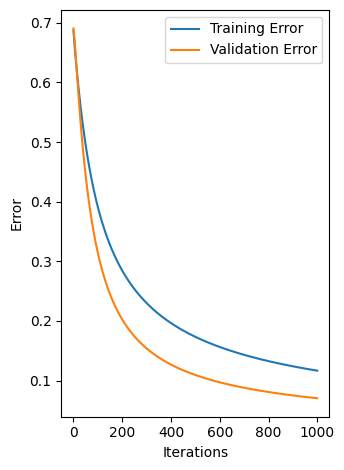

In [11]:
plt.subplot(1,2,2)
plt.plot(train_err, label="Training Error")
plt.plot(val_err, label="Validation Error")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
def confusion_matrix(X, y, w, threshold=0.5):
    prob = sigmoid(X @ w)
    pred = (prob >= threshold).astype(int)

    TP = np.sum((y == 1) & (pred == 1))
    TN = np.sum((y == 0) & (pred == 0))
    FP = np.sum((y == 0) & (pred == 1))
    FN = np.sum((y == 1) & (pred == 0))

    return np.array([[TP, FP], [FN, TN]])

def metrics(cm):
    TP, FP = cm[0]
    FN, TN = cm[1]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

T_Precision, T_Recall, T_F1 = metrics(confusion_matrix(X_T, y_T, w))
V_Precision, V_Recall, V_F1 = metrics(confusion_matrix(X_V, y_V, w))
O_Precision, O_Recall, O_F1 = metrics(confusion_matrix(X_O, y_O, w))

print("\nTraining set:")
print("confusion matrix:")
print(confusion_matrix(X_T, y_T, w))
print(f"Precision: {T_Precision:.4f}, Recall: {T_Recall:.4f}, F1-Score: {T_F1:.4f}")
print("\nValidation set:")
print("confusion matrix:")
print(confusion_matrix(X_V, y_V, w))
print(f"Precision: {V_Precision:.4f}, Recall: {V_Recall:.4f}, F1-Score: {V_F1:.4f}")
print("\nTest set:")
print("confusion matrix:")
print(confusion_matrix(X_O, y_O, w))
print(f"Precision: {O_Precision:.4f}, Recall: {O_Recall:.4f}, F1-Score: {O_F1:.4f}")



Training set:
confusion matrix:
[[38  1]
 [ 0 31]]
Precision: 0.9744, Recall: 1.0000, F1-Score: 0.9870

Validation set:
confusion matrix:
[[ 5  0]
 [ 0 10]]
Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Test set:
confusion matrix:
[[6 0]
 [1 8]]
Precision: 1.0000, Recall: 0.8571, F1-Score: 0.9231


In [13]:
value = np.arange(0, 1.05, 0.05)
precision_list_T, recall_list_T = [], []
precision_list_V, recall_list_V = [], []
precision_list_O, recall_list_O = [], []

for t in value:
    cm_T = confusion_matrix(X_T, y_T, w, threshold=t)
    p_T, r_T, _ = metrics(cm_T)
    precision_list_T.append(p_T)
    recall_list_T.append(r_T)

    cm_V = confusion_matrix(X_V, y_V, w, threshold=t)
    p_V, r_V, _ = metrics(cm_V)
    precision_list_V.append(p_V)
    recall_list_V.append(r_V)

    cm_O = confusion_matrix(X_O, y_O, w, threshold=t)
    p_O, r_O, _ = metrics(cm_O)
    precision_list_O.append(p_O)
    recall_list_O.append(r_O)

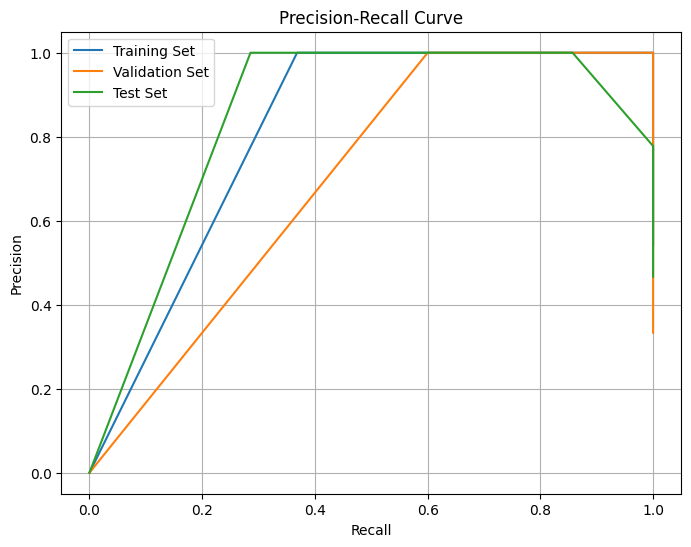

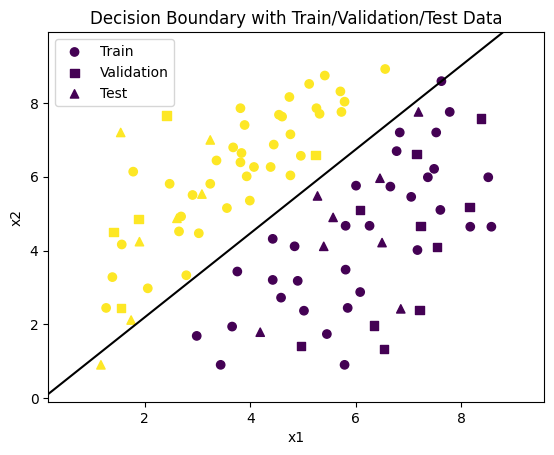

In [14]:
plt.figure(figsize=(8,6))
plt.plot(recall_list_T, precision_list_T, label="Training Set")
plt.plot(recall_list_V, precision_list_V, label="Validation Set")
plt.plot(recall_list_O, precision_list_O, label="Test Set")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# (c) Decision Boundary Plot

x1_min, x1_max = X[:,1].min() - 1, X[:,1].max() + 1
x2_min, x2_max = X[:,2].min() - 1, X[:,2].max() + 1

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))

grid = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]
probs = sigmoid(grid @ w).reshape(xx1.shape)

plt.contour(xx1, xx2, probs, levels=[0.5], colors="black")

plt.scatter(X_T[:,1], X_T[:,2], c=y_T, marker="o", label="Train")
plt.scatter(X_V[:,1], X_V[:,2], c=y_V, marker="s", label="Validation")
plt.scatter(X_O[:,1], X_O[:,2], c=y_O, marker="^", label="Test")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary with Train/Validation/Test Data")
plt.legend()
plt.show()